# Lab 1d Quantenschaltungen

Voraussetzung

- [Qiskit-Grundlagen](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Kapitel 1.2 Die Atome der Berechnung](https://qiskit.org/textbook/ch-states/atoms-computation.html)

Andere relevante Materialien

- [Greifen Sie auf IBM Quantum Systems zu](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [Konfiguration von IBM Quantum-Systemen](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpilieren](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum-Konto](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantenschaltungen](https://qiskit.org/documentation/apidoc/circuit.html) 

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

<h2 style="font-size:24px;">Teil 1: Klassische Logikgatter mit Quantenschaltkreisencf</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Tor</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Erstellen Sie Quantenschaltungsfunktionen, die die XOR-, AND-, NAND- und OR-Gatter berechnen können, indem Sie das NOT-Gatter (ausgedrückt als x in Qiskit), das CNOT-Gatter (ausgedrückt als cx in Qiskit) und das Toffoli-Gatter (ausgedrückt als ccx in Qiskit) verwenden.</p>
</div>

Als Beispiel wird eine Implementierung des `NOT` -Gatters bereitgestellt.

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

NOT with input 0 gives output 1


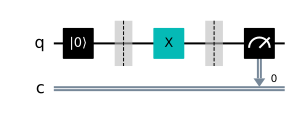

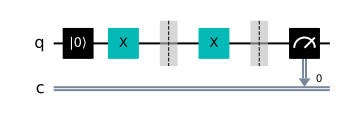

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

<h3 style="font-size: 20px">📓 XOR-Gatter</h3>

Nimmt zwei binäre Strings als Input und gibt einen als Output zurück.

Der Ausgang ist '0', wenn die Eingänge gleich sind, andernfalls '1'.

In [2]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [1]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">📓 UND Tor</h3>

Nimmt zwei binäre Strings als Input und gibt einen als Output zurück.

Der Ausgang ist nur dann `'1'` , wenn beide Eingänge `'1'` sind.

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [2]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">📓 NAND-Gatter</h3>

Nimmt zwei binäre Strings als Input und gibt einen als Output zurück.

Der Ausgang ist nur dann `'0'` , wenn beide Eingänge `'1'` sind.

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [3]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">📓 ODER-Tor</h3>

Nimmt zwei binäre Strings als Input und gibt einen als Output zurück.

Der Ausgang ist '1', wenn einer der Eingänge '1' ist.

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [4]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h2 style="font-size:24px;">Teil 2: UND-Gatter auf Quantencomputer</h2>
<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Tor</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Führen Sie ein UND-Gatter auf zwei Quantensystemen aus und erfahren Sie, wie sich die unterschiedlichen Schaltungseigenschaften auf das Ergebnis auswirken.</p>
</div>

In Teil 1 haben Sie aus Quantengattern ein `AND` -Gatter gemacht und es auf dem Simulator ausgeführt. Hier in Teil 2 werden Sie es noch einmal tun, aber stattdessen die Schaltungen auf einem echten Quantencomputer ausführen. Wenn Sie ein echtes Quantensystem verwenden, sollten Sie bedenken, dass heutige Quantencomputer nicht fehlertolerant sind. Sie sind laut.

Das „Rauschen“ in einem Quantensystem ist die kollektive Wirkung all der Dinge, die nicht passieren sollten, aber dennoch passieren. Rauschergebnisse in Ausgängen sind nicht immer das, was wir erwarten würden. Mit allen Prozessen in einem Quantenschaltkreis ist Rauschen verbunden: Vorbereiten des Anfangszustands, Anwenden von Gattern und Qubit-Messung. Bei den Gattern können die Rauschpegel zwischen verschiedenen Gattern und zwischen verschiedenen Qubits variieren. `cx` Gatter sind in der Regel lauter als jedes einzelne Qubit-Gatter.

Hier verwenden wir die Quantensysteme aus der IBM Quantum Experience. Wenn Sie keinen Zugriff haben, können Sie dies [hier](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems) tun.

Jetzt, da Sie bereit sind, den echten Quantencomputer zu verwenden, können wir beginnen.

<h3 style="font-size: 20px">Schritt 1. Auswahl eines Geräts</h3>

Laden Sie zuerst das Konto aus den auf der Festplatte gespeicherten Anmeldeinformationen, indem Sie die folgende Zelle ausführen:

In [17]:
IBMQ.load_account()

Nachdem Ihr Konto geladen wurde, können Sie die Liste der Anbieter sehen, auf die Sie Zugriff haben, indem Sie die Zelle unten ausführen. Jeder Anbieter bietet unterschiedliche Systeme zur Nutzung an. Für offene Benutzer gibt es normalerweise nur einen Anbieter `ibm-q/open/main` :.

In [16]:
IBMQ.providers()

Lassen Sie uns den Anbieter mit `get_provider` . Der Befehl <code>provider.backends( )</code> zeigt Ihnen die Liste der Backends, die Ihnen vom ausgewählten Anbieter zur Verfügung stehen.

In [15]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

Unter diesen Optionen können Sie eines der Systeme auswählen, auf dem Ihre Schaltungen ausgeführt werden sollen. Alle außer dem `ibmq_qasm_simulator` sind echte Quantencomputer, die Sie verwenden können. Die Unterschiede zwischen diesen Systemen liegen in der Anzahl der Qubits, ihrer Konnektivität und den Systemfehlerraten.

Beim Ausführen der folgenden Zelle wird Ihnen ein Widget angezeigt, das alle Informationen zu Ihrer Wahl des Backends anzeigt. Durch Klicken auf die Registerkarten erhalten Sie die gewünschten Informationen. Beispielsweise befinden sich der Backend-Status, die Anzahl der Qubits und die Konnektivität auf der Registerkarte „ `configuration` “, während die Registerkarte „ `Error Map` “ die neuesten Rauschinformationen für das System anzeigt. 

In [9]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_16_melbourne')
backend_ex

Für unsere UND-Gatter-Schaltung benötigen wir ein Backend mit drei oder mehr Qubits, was für alle realen Systeme außer für `ibmq_armonk` . Nachfolgend finden Sie ein Beispiel zum Filtern von Backends, bei dem wir nach der Anzahl der Qubits filtern und Simulatoren entfernen:

In [8]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

Eine praktische Möglichkeit, ein System auszuwählen, ist die Verwendung der `least_busy` Funktion, um das Backend mit der niedrigsten Anzahl von Jobs in der Warteschlange zu erhalten. Der Nachteil ist, dass das Ergebnis möglicherweise eine relativ schlechte Genauigkeit aufweist, da, nicht überraschend, die Systeme mit der niedrigsten Fehlerrate am beliebtesten sind.

In [17]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

Echte Quantencomputer müssen regelmäßig neu kalibriert werden, und die Genauigkeit eines bestimmten Qubits oder Gates kann sich im Laufe der Zeit ändern. Daher kann variieren, welches System Ergebnisse mit weniger Fehlern erzeugen würde. `ibmq_athens` tendenziell relativ niedrige Fehlerraten auf.

In dieser Übung wählen wir zwei Systeme aus: `ibmq_athens` wegen seiner niedrigen Fehlerraten und `ibmqx2` wegen seiner zusätzlichen Konnektivität, insbesondere seiner dreieckigen Konnektivität, die für Schaltungen mit Toffoli-Gattern nützlich sein wird.

In [5]:
# run this cell
backend1 = provider.get_backend('ibmqx2')
backend2 = provider.get_backend('ibmq_athens')

<h3 style="font-size: 20px">Schritt 2. Definieren Sie die UND-Funktion für ein reales Gerät</h3>

Wir definieren nun die UND-Funktion. Wir wählen 8192 als Anzahl der Aufnahmen, die maximale Anzahl der Aufnahmen für offene IBM-Systeme, um die Streuung im Endergebnis zu reduzieren. Verwandte Informationen sind [hier](https://quantum-computing.ibm.com/docs/manage/backends/configuration) gut erklärt

<h4 style="font-size: 16px">Qiskit-Transpiler</h4>

Es ist wichtig zu wissen, dass beim Ausführen einer Schaltung auf einem echten Quantencomputer normalerweise Schaltungen für das von Ihnen ausgewählte Backend transpiliert werden müssen, damit die Schaltung nur die Gatter enthält, die der Quantencomputer tatsächlich ausführen kann. Dies beinhaltet in erster Linie das Hinzufügen von Swap-Gates, sodass Zwei-Qubit-Gates in der Schaltung auf die Qubit-Paare auf dem Gerät abgebildet werden, die diese Gates tatsächlich ausführen können. Die folgende Zelle zeigt das UND-Gatter, dargestellt als Toffoli-Gatter, zerlegt in Einzel- und Zwei-Qubit-Gatter, die die einzigen Gattertypen sind, die auf IBM-Hardware ausgeführt werden können. Vorausgesetzt, dass CNOT-Gatter zwischen allen drei Qubits, einer Dreieckstopologie, ausgeführt werden können, sind keine anderen Gatter erforderlich.

AND gate


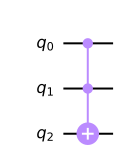



Transpiled AND gate with all the reqiured connectiviy


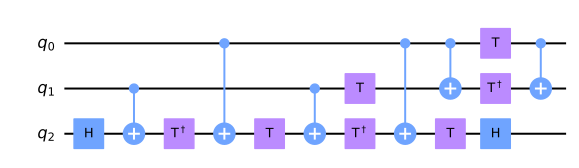

In [4]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw()

Darüber hinaus gibt es häufig Optimierungen, die der Transpiler durchführen kann, um die Gesamtanzahl der Gates und damit die Gesamtlänge der Eingangsschaltungen zu reduzieren. Beachten Sie, dass das Hinzufügen von Swaps zum Anpassen an die Gerätetopologie und Optimierungen zum Reduzieren der Länge einer Schaltung miteinander im Widerspruch stehen. Im Folgenden verwenden wir `initial_layout` , das es uns ermöglicht, die Qubits auf einem Gerät auszuwählen, das für die Berechnung und das `optimization_level` verwendet wird, ein Argument, das die Auswahl aus internen Standardwerten für die Schaltungstauschzuordnung und durchzuführende Optimierungsmethoden ermöglicht.

Hier können Sie mehr über die Transpile-Funktion [erfahren](https://qiskit.org/documentation/apidoc/transpiler.html) .

Lassen Sie uns die UND-Funktion in Teil 1 für das reale System mit dem enthaltenen Transpile-Schritt richtig modifizieren.

In [ ]:
from qiskit.tools.monitor import job_monitor

In [6]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = execute(qc_trans, backend, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

Wenn Sie Jobs an Quantensysteme senden, beginnt `job_monitor` mit der Verfolgung, wo sich Ihr gesendeter Job in der Pipeline befindet.

<h4 style="font-size: 16px">Fall A) Drei Qubits auf <code>ibmqx2</code> mit der Dreieckskonnektivität</h4>

Untersuchen `ibmqx2` mit dem zuvor vorgestellten Widget. Finden Sie eine Gruppe von drei Qubits mit Dreiecksverbindung und bestimmen Sie Ihr anfängliches Layout.

In [61]:
# run this cell for the widget
backend1

<p>📓 Weisen Sie der <code>layout1</code> in der Zelle darunter Ihre Layout-Wahl zu</p>

In [11]:
# Assign your choice of the initial_layout to the variable layout1 as a list 
# ex) layout1 = [0,2,4]
layout1 = 

<p>📓 Beschreiben Sie den Grund für Ihre Wahl des ursprünglichen Layouts.</p>

Führen Sie das `AND` Gatter auf `ibmqx2` aus, indem Sie die Zelle unten ausführen.

In [13]:
output1_all = []
qc_trans1_all = []
prob1_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1, output1 = AND(input1, input2, backend1, layout1)
        
        output1_all.append(output1)
        qc_trans1_all.append(qc_trans1)
        
        prob = output1[str(int( input1=='1' and input2=='1' ))]/8192
        prob1_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print( '{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

Sobald Ihr Job durch Ausführen beendet ist, können Sie einfach auf die Ergebnisse zugreifen über:

```python
results = backend.retrieve_job('JOB_ID').result().
```

Ihre job_ids werden über die oben definierte `AND` Funktion ausgegeben. Sie finden die job_ids auch aus den Ergebnissen unter Ihrem `IQX` Konto. Weitere Informationen finden Sie [hier](https://quantum-computing.ibm.com/docs/manage/account/ibmq) . 

<h4 style="font-size: 16px">Fall B) Drei Qubits auf <code>ibmq_athens</code> für die lineare Nächste-Nachbar-Konnektivität</h4>

Untersuchen `ibmq_athens` über das Widget, indem Sie die Zelle unten ausführen.

In [64]:
backend2

<p>📓 Finden Sie drei Qubits mit der linearen Nächste-Nachbar-Konnektivität. Bestimmen Sie das Ausgangslayout unter Berücksichtigung der Fehlerkarte und weisen Sie es der Listenvariablen layout2 zu.</p>

In [65]:
layout2 = []

<p>📓 Beschreiben Sie den Grund für die Wahl des ursprünglichen Layouts.</p>

Führen Sie das `AND` Gatter auf `ibmq_athens` aus, indem Sie die Zelle unten ausführen.

In [12]:
output2_all = []
qc_trans2_all = []
prob2_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans2, output2 = AND(input1, input2, backend2, layout2)
        
        output2_all.append(output2)
        qc_trans2_all.append(qc_trans2)
        
        prob = output2[str(int( input1=='1' and input2=='1' ))]/8192
        prob2_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

<h3 style="font-size: 20px">Schritt 3. Interpretieren Sie das Ergebnis</h3>

Es gibt mehrere Größen, die die Schaltungen unterscheiden. Das Wichtigste unter ihnen ist die **Schaltungstiefe** . Die Schaltungstiefe wird [hier](https://qiskit.org/documentation/apidoc/circuit.html) im Detail definiert (Siehe die Zusatzinformationen und klicken Sie auf die Registerkarte Quantum Circuit Properties). Die Schaltungstiefe ist proportional zur Anzahl der Gatter in einer Schaltung und entspricht ungefähr der Laufzeit der Schaltung auf Hardware. Daher ist die Schaltungstiefe eine einfach zu berechnende Metrik, die verwendet werden kann, um die Wiedergabetreue einer ausgeführten Schaltung abzuschätzen.

Ein zweiter wichtiger Wert ist die Anzahl der **nichtlokalen** (Multi-Qubit-) **Gatter** in einer Schaltung. Auf IBM Quantum-Systemen ist das CNOT-Gate das einzige nichtlokale Gate, das physisch ausgeführt werden kann. Erinnern Sie sich daran, dass CNOT-Gatter die teuersten Gatter sind, und daher dient die Gesamtzahl dieser Gatter auch als guter Maßstab für die Genauigkeit der endgültigen Ausgabe.

<h4 style="font-size: 16px">A) Schaltungstiefe und Ergebnisgenauigkeit</h4>

Wenn Sie die Zellen unten ausführen, werden die vier transpilierten UND-Gatter-Schaltpläne mit den entsprechenden Eingaben angezeigt, die auf `ibmq_athens` ausgeführt wurden, und ihre Schaltungstiefen mit der Erfolgswahrscheinlichkeit für die Erzeugung der richtigen Antwort.

In [14]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[0]) )
qc_trans2_all[0].draw()

In [15]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[1]) )
qc_trans2_all[1].draw()

In [16]:
print('Transpiled AND gate circuit for ibmq_athens with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[2]) )
qc_trans2_all[2].draw()

In [17]:
print('Transpiled AND gate circuit for ibmq_athens with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[3]) )
qc_trans2_all[3].draw()

<p>📓 Erklären Sie den Grund für die Unähnlichkeit der Schaltungen. Beschreiben Sie die Beziehungen zwischen der Eigenschaft der Schaltung und der Genauigkeit der Ergebnisse.</p>

<h4 style="font-size: 16px">B) Qubit-Konnektivität und Schaltungstiefe</h4>

Untersuchen Sie die transpilierten Schaltungen für `ibmqx2` , indem Sie die Zellen unten ausführen.

In [18]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[0]) )
qc_trans1_all[0].draw()

In [19]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[1]) )
qc_trans1_all[1].draw()

In [20]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[2]) )
qc_trans1_all[2].draw()

In [21]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[3]) )
qc_trans1_all[3].draw()

<p>📓 Erklären Sie den Grund für die Ähnlichkeit der Schaltungen. Beschreiben Sie die Beziehungen zwischen den Eigenschaften der Schaltungen und der Genauigkeit der Ergebnisse.</p>

<h4 style="font-size: 16px">C) Fehlerraten und Ergebnisgenauigkeit</h4>

<p>📓 Bisher haben wir die Schaltungstiefe und die Anzahl der nichtlokalen Gates als gute Indikatoren für die Schaltungsleistung auf realen Geräten verwendet. Wir sehen jedoch etwas Interessantes in den obigen Ergebnissen. Das UND-Gatter auf <code>ibmq_athens</code> hat ca. 8–15 <code>cx</code> -Gatter pro Schaltung, hat aber eine Erfolgsrate, die mit <code>ibmqx2</code> vergleichbar oder sogar höher ist, die nur 6 <code>cx</code> -Gatter ausführt. Warum ist das?</p>